# Harum Manis Mango Grade Prediction with Classification ML

About the dataset:

The dataset contains physical measurement of Harumanis Mango (clone number MA 128) collected from the Fruit Collection Center, FAMA Perlis, Malaysia. 

Citation:
Mohammad Hafiz Ismail, Tajul Rosli Razak, Ray Adderley JM Gining, & Mohd Nazuan Wagimin. (2022). Harumanis Mango Physical Measurements [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/2366811

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv(r'C:\Users\Nizwan\Desktop\Data Science\Mango\Github\Mango-Grade-Classification\data-2023-01-18.csv')
except Exception as e:
    print("Error loading CSV:", e)


In [3]:
df

,No,Weight,Length,Circumference,Grade
0,1,486.5,14.0,27.0,A
1,2,388.4,12.0,26.0,A
2,3,493.7,12.0,26.5,A
3,4,342.5,10.0,24.3,A
4,5,401.5,11.0,25.0,A
...,...,...,...,...,...
100,101,296.0,11.7,22.2,C
101,102,306.1,11.9,22.7,C
102,103,240.0,10.2,20.8,C
103,104,268.4,10.7,20.9,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             105 non-null    int64  
 1   Weight         105 non-null    float64
 2   Length         105 non-null    float64
 3   Circumference  105 non-null    float64
 4   Grade          105 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.2+ KB


In [5]:
# Summary statistics for numerical data
numerical_data = df.select_dtypes(include=[np.number])
numerical_data.describe()

,No,Weight,Length,Circumference
count,105.000000,105.000000,105.000000,105.000000
mean,53.000000,351.010476,11.988571,23.820952
std,30.454885,74.172386,1.250486,2.235238
min,1.000000,235.000000,10.000000,20.300000
25%,27.000000,290.500000,10.900000,21.700000
50%,53.000000,341.700000,11.800000,24.000000
75%,79.000000,407.900000,12.800000,25.800000
max,105.000000,571.900000,15.400000,29.900000


In [6]:
# Summary statistics for numerical data
df['Grade'].value_counts()


Grade
C    38
A    34
B    33
Name: count, dtype: int64


# Data Cleaning & preparation

In [7]:
# Check for missing value
df.isnull().sum()


No               0
Weight           0
Length           0
Circumference    0
Grade            0
dtype: int64

In [8]:

df1=df.drop(columns='No', axis=1)

In [9]:
df1

,Weight,Length,Circumference,Grade
0,486.5,14.0,27.0,A
1,388.4,12.0,26.0,A
2,493.7,12.0,26.5,A
3,342.5,10.0,24.3,A
4,401.5,11.0,25.0,A
...,...,...,...,...
100,296.0,11.7,22.2,C
101,306.1,11.9,22.7,C
102,240.0,10.2,20.8,C
103,268.4,10.7,20.9,C


# EDA

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Length'}>],
       [<Axes: title={'center': 'Circumference'}>, <Axes: >]],
      dtype=object)

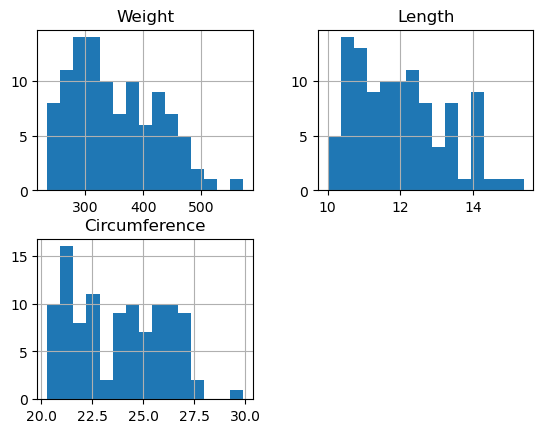

In [10]:
#checking any outliers presence
df1.hist(bins=15)

Inference: All data features show mild skewness distribution

<Axes: xlabel='variable', ylabel='value'>

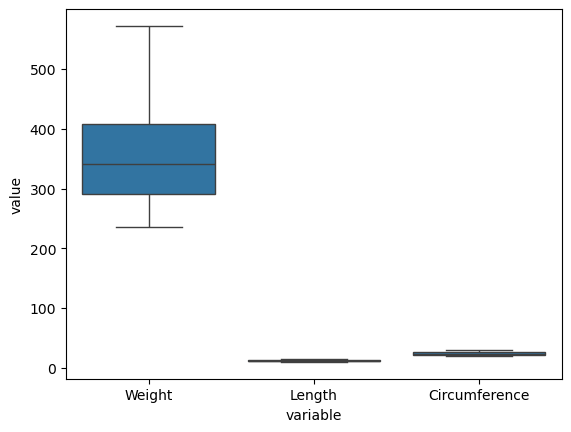

In [11]:
sns.boxplot(data=pd.melt(df1.iloc[:,:3]), x='variable', y='value')

Inference: No significant outliers present

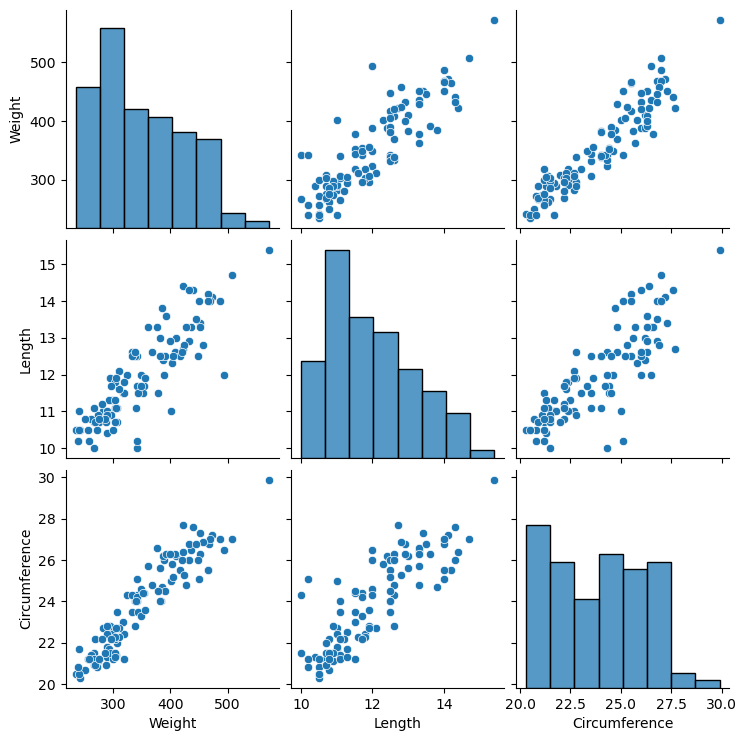

In [12]:
# checkint the correlation between features
sns.pairplot(df1)


Inference: Positive correlation between the physical measurement variables show proportional increament with mango sizes

<Axes: >

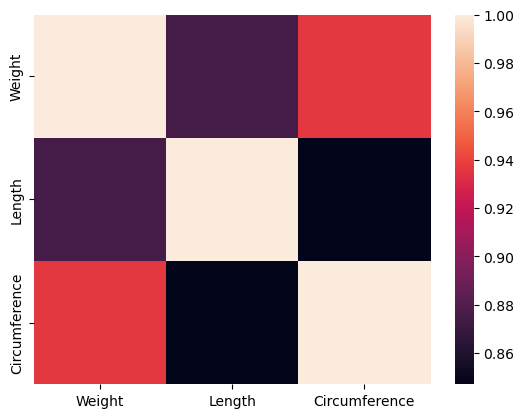

In [13]:
sns.heatmap(df1[['Weight','Length','Circumference']].corr())

Inference: The heatmap shows strong relationship between those numerical data

# Machine Learning

In [14]:
# data scaling for machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder

#lb=LabelEncoder()
#df1['Grade']=lb.fit_transform(df1['Grade'])

x=df1.drop('Grade', axis=1)
y=df1['Grade']

# data standardization
ss=StandardScaler()
xScaled=ss.fit_transform(x)

In [15]:
df1

,Weight,Length,Circumference,Grade
0,486.5,14.0,27.0,A
1,388.4,12.0,26.0,A
2,493.7,12.0,26.5,A
3,342.5,10.0,24.3,A
4,401.5,11.0,25.0,A
...,...,...,...,...
100,296.0,11.7,22.2,C
101,306.1,11.9,22.7,C
102,240.0,10.2,20.8,C
103,268.4,10.7,20.9,C


In [16]:
# random splitting data to train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(xScaled, y, test_size=0.2, random_state=1)

In [17]:
# Define accuracy score & confusion matrix funcction for model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

def eval(model):
             
    trainPredict=model.predict(xtrain)  
    testPredict=model.predict(xtest)
    
    trainAccScore=round(accuracy_score(ytrain,trainPredict)*100,2)
    testAccScore=round(accuracy_score(ytest,testPredict)*100,2)
    
    cm=ConfusionMatrixDisplay(confusion_matrix(ytest,testPredict),display_labels=['Grade A','Grade B','Grade C']) 
                       
    trainScore=print('Train Data Accuracy Score:',  str(trainAccScore),'%')
    testScore=print('Test Data Accuracy Score:', str(testAccScore),'%')
    
    return trainAccScore,testAccScore,trainScore,testScore,cm.plot()


In [18]:
# creating table to store accuracy scores of the models
table = pd.DataFrame(columns=['Model','Train Accuracy %','Test Accuracy %'])

In [19]:
# Applying RBF-SVM Technique
from sklearn.svm import SVC

# kernel = rbf
RBF_SVMmodel=SVC(kernel='rbf').fit(xtrain,ytrain)


Train Data Accuracy Score: 86.9 %
Test Data Accuracy Score: 90.48 %


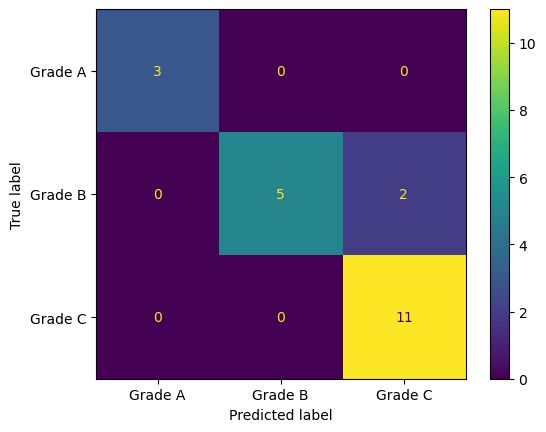

In [20]:
# SVM Model Evaluation
trainAccScore,testAccScore,trainScore,testScore,cmt=eval(RBF_SVMmodel)

newRow = {'Model': 'RBF_SVMmodel', 'Train Accuracy %': trainAccScore,'Test Accuracy %': testAccScore}

# table = table.append(newRow, ignore_index=True)
table = pd.concat([table, pd.DataFrame([newRow])], ignore_index=True)

In [21]:
table

,Model,Train Accuracy %,Test Accuracy %
0,RBF_SVMmodel,86.9,90.48


In [22]:
# Applying Linear-SVM Technique

# kernel = linear
linear_SVMmodel=SVC(kernel='linear').fit(xtrain,ytrain)


Train Data Accuracy Score: 83.33 %
Test Data Accuracy Score: 90.48 %


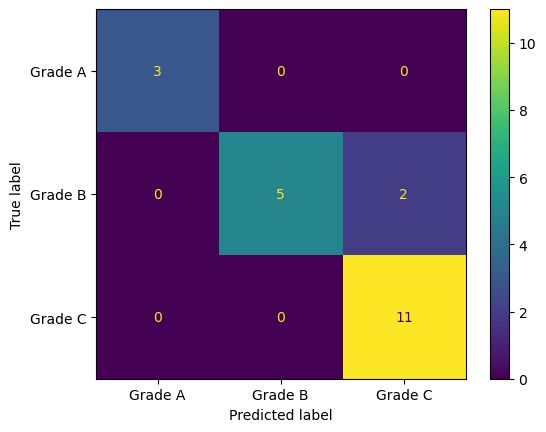

In [23]:
trainAccScore,testAccScore,trainScore,testScore,cm=eval(linear_SVMmodel)

newRow = {'Model': 'linear_SVMmodel', 'Train Accuracy %': trainAccScore,'Test Accuracy %': testAccScore}

# table = table.append(newRow, ignore_index=True)
table = pd.concat([table, pd.DataFrame([newRow])], ignore_index=True)


In [24]:
# Applying Random Forest Technique
from sklearn.ensemble import RandomForestClassifier

RFmodel=RandomForestClassifier(criterion='entropy').fit(xtrain,ytrain)

Train Data Accuracy Score: 100.0 %
Test Data Accuracy Score: 80.95 %


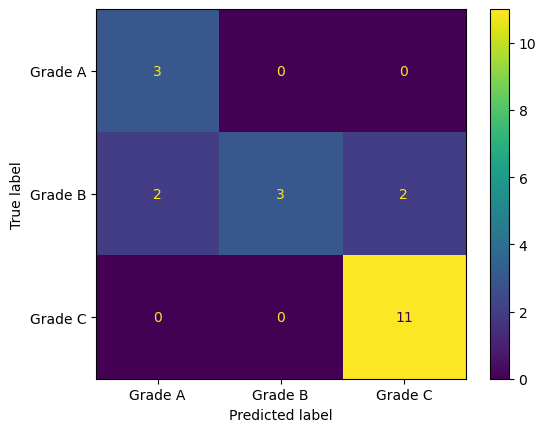

In [25]:
# Random Forest Model Evaluation
trainAccScore,testAccScore,trainScore,testScore,cm=eval(RFmodel)

newRow = {'Model': 'Random Forest model', 'Train Accuracy %': trainAccScore,'Test Accuracy %': testAccScore}

#table = table.append(newRow, ignore_index=True)
table = pd.concat([table, pd.DataFrame([newRow])], ignore_index=True)

In [26]:
# Applying K Nearest Neighbours Classifier tuning with GridsearchCV to find best K value

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier()
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

bestParam=GridSearchCV(estimator=knn,param_grid=params).fit(xtrain,ytrain).best_params_
bestParam

{'n_neighbors': 2}

In [27]:
KNNmodel=KNeighborsClassifier(n_neighbors=2).fit(xtrain,ytrain)

Train Data Accuracy Score: 89.29 %
Test Data Accuracy Score: 71.43 %


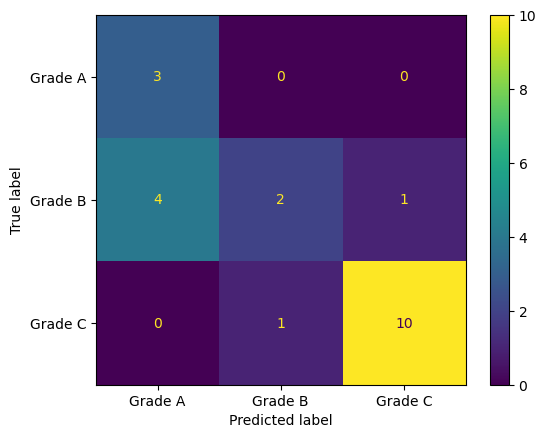

In [28]:
# KNN Model Evaluation
trainAccScore,testAccScore,trainScore,testScore,cm=eval(KNNmodel)

newRow = {'Model': 'KNN model', 'Train Accuracy %': trainAccScore,'Test Accuracy %': testAccScore}

#table = table.append(newRow, ignore_index=True)
table = pd.concat([table, pd.DataFrame([newRow])], ignore_index=True)

In [29]:
table.sort_values(by='Test Accuracy %', ascending=False)

,Model,Train Accuracy %,Test Accuracy %
0,RBF_SVMmodel,86.90,90.48
1,linear_SVMmodel,83.33,90.48
2,Random Forest model,100.00,80.95
3,KNN model,89.29,71.43


The table shows that Random Forest and KNN models ared overfit model for a small data set like this.

SVM with RBF kernel is chosen as the best model for predictions.

In [32]:
# Saving the model for deployment with Streamlit
import pickle as pkl
model = pkl.dump(RBF_SVMmodel, open(r'C:\Users\Nizwan\Desktop\Data Science\Mango\Github\Mango-Grade-Classification/model.pkl', 'wb'))